<a href="https://colab.research.google.com/github/pkant-0/machine_learning_tensorflow/blob/main/computer_vision_model_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import tensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


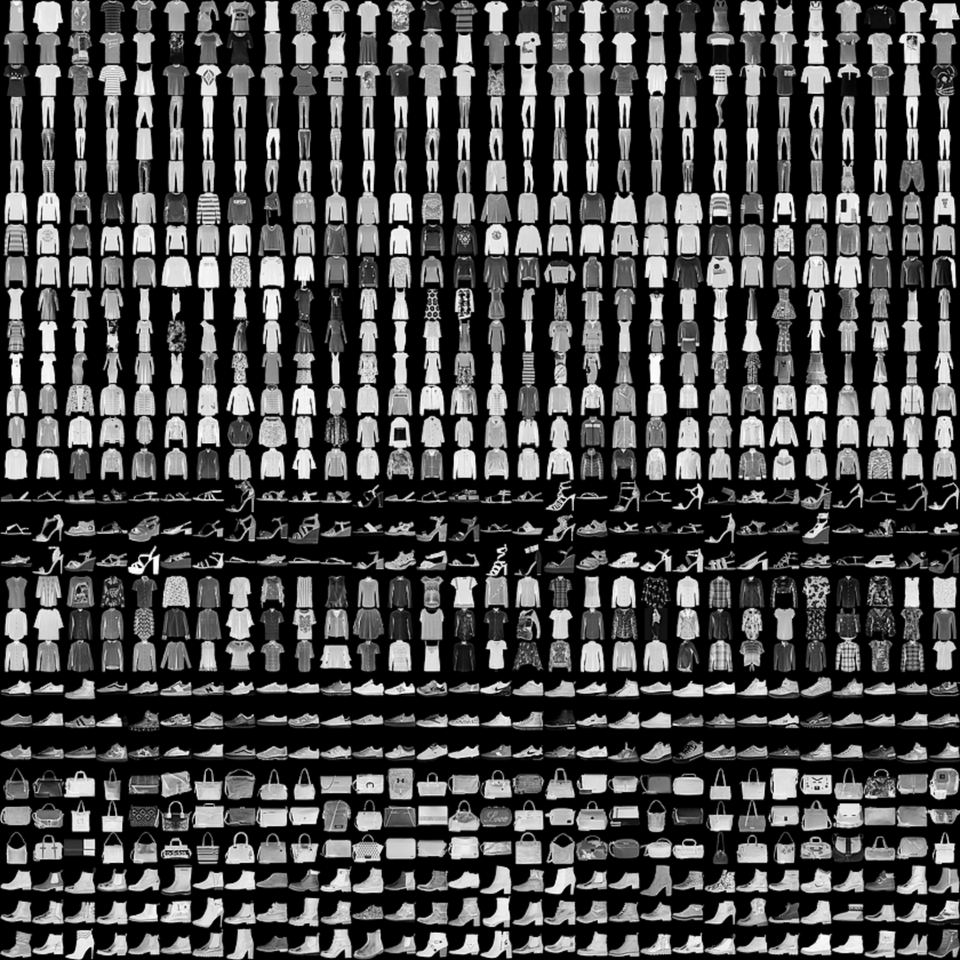

The labels associated with the dataset are:

Label

Description

0

T-shirt/top

1

Trouser

2

Pullover

3

Dress

4

Coat

5

Sandal

6

Shirt

7

Sneaker

8

Bag

9

Ankle boot

The Fashion MNIST data is available in the tf.keras.datasets API. Load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on that object gives you two sets of two lists: training values and testing values, which represent graphics that show clothing items and their labels.

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


What do those values look like? Print a training image and a training label to see. You can experiment with different indices in the array.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

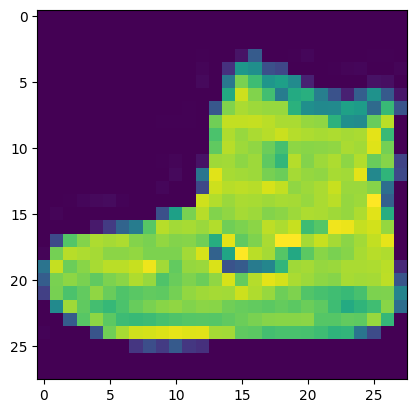

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all the values are integers between 0 and 255. When training a neural network, it's easier to treat all values as between 0 and 1, a process called normalization. Fortunately, Python provides an easy way to normalize a list like that without looping.

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

You may also want to look at 42, a different boot than the one at index 0.

Now, you might be wondering why there are two datasets—training and testing.

The idea is to have one set of data for training and another set of data that the model hasn't yet encountered to see how well it can classify values. After all, when you're done, you'll want to use the model with data that it hadn't previously seen! Also, without separate testing data, you'll run the risk of the network only memorizing its training data without generalizing its

3. Design the model
Now design the model. You'll have three layers. Go through them one-by-one and explore the different types of layers and the parameters used for each.

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential defines a sequence of layers in the neural network.
Flatten takes a square and turns it into a one-dimensional vector.
Dense adds a layer of neurons.
Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

4. Compile and train the model
Now that the model is defined, the next thing to do is build it. Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. The goal is to have the model figure out the relationship between the training data and its training labels. Later, you want your model to see data that resembles your training data, then make a prediction about what that data should look like.

Notice the use of metrics= as a parameter, which allows TensorFlow to report on the accuracy of the training by checking the predicted results against the known answers (the labels).

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7818 - loss: 0.6207
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8618 - loss: 0.3849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8783 - loss: 0.3361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8849 - loss: 0.3095
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8912 - loss: 0.2898


When the model is done training, you will see an accuracy value at the end of the final epoch. It might look something like 0.8926 as above. This tells you that your neural network is about 89% accurate in classifying the training data. In other words, it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for five epochs and done quickly.

5. Test the model
How would the model perform on data it hasn't seen? That's why you have the test set. You call model.evaluate and pass in the two sets, and it reports the loss for each. Give it a try:

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3558


[0.3588597774505615, 0.8687000274658203]

That example returned an accuracy of .8789, meaning it was about 88% accurate. (You might have slightly different values.)

As expected, the model is not as accurate with the unknown data as it was with the data it was trained on! As you learn more about TensorFlow, you'll find ways to improve that.

To explore further, try the exercises in the next step.

6. Exploration exercises
Exercise 1
For this first exercise, run the following code:

In [10]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.0266350e-05 2.1623769e-07 4.4677955e-07 2.2197645e-08 6.2145011e-07
 1.8485731e-03 2.2818190e-06 9.3903571e-02 3.6948903e-05 9.0419698e-01]


It creates a set of classifications for each of the test images, then prints the first entry in the classifications. The output after you run it is a list of numbers. Why do you think that is and what do those numbers represent?

Try running print(test_labels[0]) and you'll get a 9. Does that help you understand why the list looks the way it does?

The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. For example, the first value in the list is the probability that the clothing is of class 0 and the next is a 1. Notice that they are all very low probabilities except one. Also, because of Softmax, all the probabilities in the list sum to 1.0.

The list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the neural network has predicted that the item it is classifying is most likely an ankle boot.

Exercise 2
Look at the layers in your model. Experiment with different values for the dense layer with 512 neurons.

What different results do you get for loss and training time? Why do you think that's the case?

For example, if you increase to 1,024 neurons, you have to do more calculations, slowing down the process. But in this case they have a good impact because the model is more accurate. That doesn't mean more is always better. You can hit the law of diminishing returns very quickly.

Exercise 3
What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. The details of the error may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now your data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to flatten that 28,28 into a 784x1.

Instead of writing all the code, add the Flatten() layer at the beginning. When the arrays are loaded into the model later, they'll automatically be flattened for you.

Exercise 4
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?

Try training the network with 5. You get an error as soon as it finds an unexpected value. Another rule of thumb—the number of neurons in the last layer should match the number of classes you are classifying for. In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer.

Exercise 5
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10?

There isn't a significant impact because this is relatively simple data. For far more complex data, extra layers are often necessary.

Exercise 6
Before you trained, you normalized the data, going from values that were 0 through 255 to values that were 0 through 1. What would be the impact of removing that? Here's the complete code to give it a try (note that the two lines that normalize the data are commented out).

In [11]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 16.8880
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.5086
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.4899
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.4689
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5119
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[2.7278547e-28 6.6336058e-22 6.6107033e-34 1.3967457e-24 6.2541085e-36
 1.7795055e-03 1.3230379e-24 3.2923225e-02 3.3785977e-17 9.6529728e-01]
9


7. Explore callbacks
Earlier, when you trained for extra epochs, you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that and you might have thought that it'd be nice if you could stop the training when you reach a desired value, such as 95% accuracy. If you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs?

Like any other program, you have callbacks! See them in action:

In [12]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7933 - loss: 0.5875
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8666 - loss: 0.3670
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8826 - loss: 0.3178
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8893 - loss: 0.2961
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8982 - loss: 0.2786
